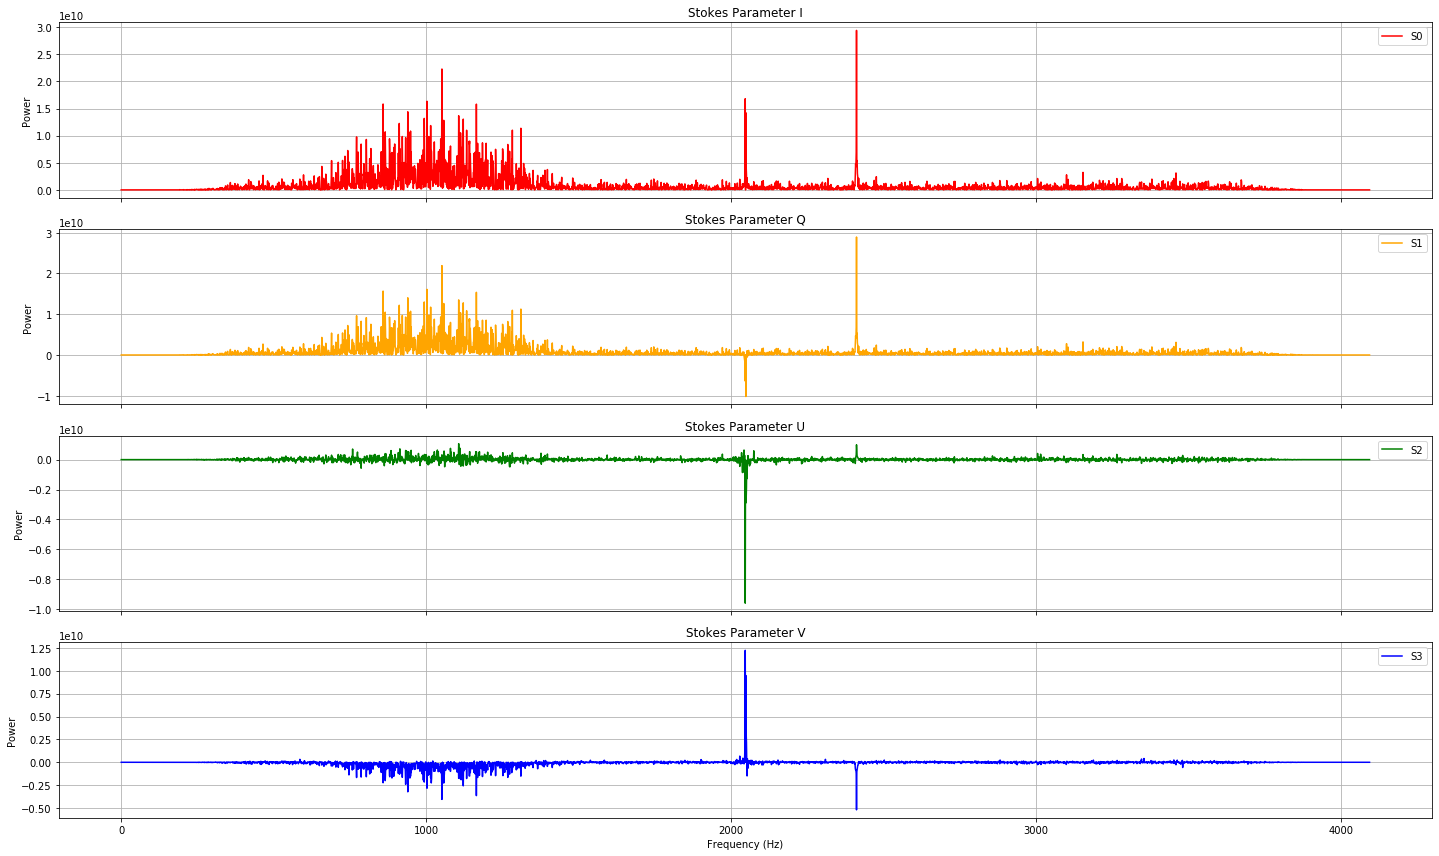

In [3]:
import numpy as np
import matplotlib.pyplot as plt

file_path = '2241_3MHz.bin'
sample_rate = 2e6  # Sample rate in Hz
num_samples = 10485760  # Number of samples to read
fft_size = 4096     # FFT size (should be a power of 2)
dc_spike = np.int(fft_size/2)

with open(file_path, 'rb') as file:
    data = np.fromfile(file, dtype='<i2', count=num_samples * 2)

cx = data[::4] + 1j * data[1::4]
cy = data[2::4] + 1j * data[3::4]

px = np.fft.fftshift(np.fft.fft(cx, fft_size))
py = np.fft.fftshift(np.fft.fft(py, fft_size))

xx = np.real(px) * np.real(px) + np.imag(px) * np.imag(px)
yy = np.real(py) * np.real(py) + np.imag(py) * np.imag(py)

frequency_axis = np.fft.fftshift(np.fft.fftfreq(fft_size, 1 / sample_rate))

S0 = np.zeros(fft_size)
S1 = np.zeros(fft_size)
S2 = np.zeros(fft_size)
S3 = np.zeros(fft_size)

for i in range(fft_size):
    S0[i] = xx[i] + yy[i]
    S1[i] = xx[i] - yy[i]
    S2[i] = 2.0 * (np.real(px[i]) * np.real(py[i]) + np.imag(px[i]) * np.imag(py[i]))
    S3[i] = 2.0 * (np.imag(px[i]) * np.real(py[i]) - np.real(px[i]) * np.imag(py[i]))

S0[dc_spike] = 0
S1[dc_spike] = 0
S2[dc_spike] = 0
S3[dc_spike] = 0
 
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(20, 12), sharex=True)

ax1.plot(S0, label='S0', color='red')
ax1.set_title('Stokes Parameter I')
ax1.set_ylabel('Power')
ax1.legend()
ax1.grid(True)

ax2.plot(S1, label='S1', color='orange')
ax2.set_title('Stokes Parameter Q')
ax2.set_ylabel('Power')
ax2.legend()
ax2.grid(True)

ax3.plot(S2, label='S2', color='green')
ax3.set_title('Stokes Parameter U')
ax3.set_ylabel('Power')
ax3.legend()
ax3.grid(True)

ax4.plot(S3, label='S3', color='blue')
ax4.set_title('Stokes Parameter V')
ax4.set_xlabel('Frequency (Hz)')
ax4.set_ylabel('Power')
ax4.legend()
ax4.grid(True)

plt.tight_layout()
plt.show()


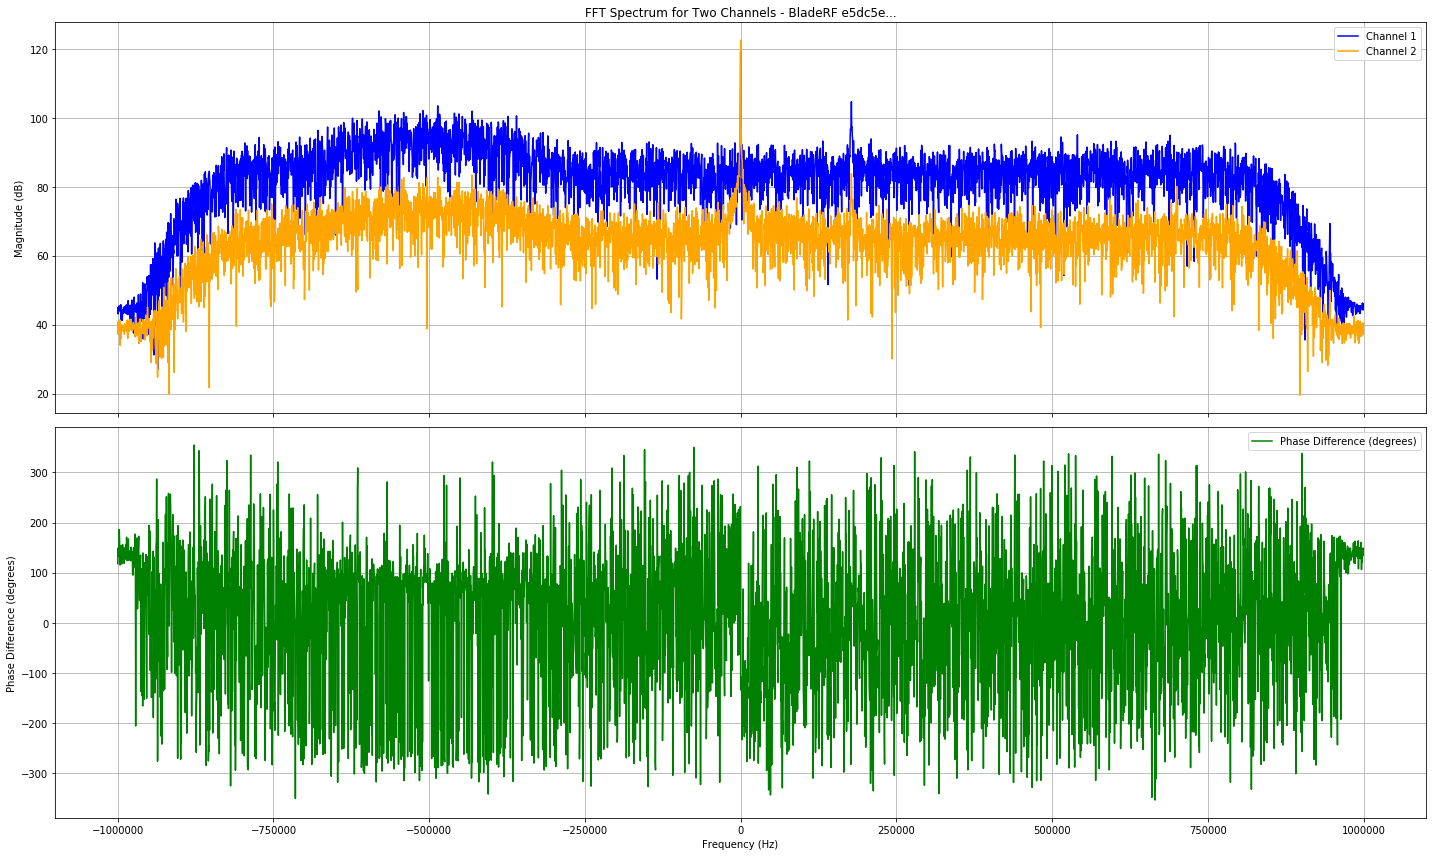

In [2]:
phase_difference_degrees = np.angle(yy) - np.angle(xx)
phase_difference_degrees = np.degrees(phase_difference_degrees)

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(20, 12), sharex=True)

ax1.plot(frequency_axis, 20 * np.log10(np.abs(xx)), label='Channel 1', color='blue')
ax1.plot(frequency_axis, 20 * np.log10(np.abs(yy)), label='Channel 2', color='orange')
ax1.set_title('FFT Spectrum for Two Channels - BladeRF e5dc5e...')
ax1.set_ylabel('Magnitude (dB)')
ax1.legend()
ax1.grid(True)

ax2.plot(frequency_axis, phase_difference_degrees, label='Phase Difference (degrees)', color='green')
ax2.set_xlabel('Frequency (Hz)')
ax2.set_ylabel('Phase Difference (degrees)')
ax2.legend()
ax2.grid(True)

plt.tight_layout()
plt.show()
